# TI3001C: Data Analytics and Artificial Intelligence Tools I
## M2. Data Engineering

### Content

1. Series and DataFrames
1. Columns manipulation
1. Index, selection and filtering
1. Operations
1. Date and time
1. Graph using DataFrame

In [4]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # librería para poder usad DataFrames (tablas)

### 1. Pandas

* Pandas is a Python library for data manipulation and analysis.
* Is primarily centered around two data structures: Series and DataFrames.
    * Series and DataFrames are fundamental data structures in various programming languages and libraries commonly used in data analysis and statistics.
    * They provide a flexible and intuitive way to store, organize, and work with tabular data.
    * They are ideal for tasks like data cleaning, analysis, and visualization.

#### 1.1 Series

* A one-dimensional labeled array capable of holding any data type (integers, strings, boolean values, etc.). 
* It can be thought of as a single column of data.

In [42]:
# we create a list of ice cream flavors
flavors = ["Chocolate", "Vanilla", "Strawberry", "Rum Raisin"]
# we create a Series with the list of ice cream flavors
ice_cream_flavors = pd.Series(flavors, name="Flavors") 
print(ice_cream_flavors)

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
Name: Flavors, dtype: object


In [20]:
# we create a Series with 10 random numbers
random_numbers = pd.Series(np.random.randint(0, 100, size=10), name="Random Numbers")
print(random_numbers)

0    78
1    41
2     7
3    65
4    83
5    81
6    98
7    98
8    17
9    25
Name: Random Numbers, dtype: int64


#### 1.2 DataFrame

* A two-dimensional labeled data structure with columns of potentially different types:
    * Unlike matrices, which require all elements to be of the same data type.
* It can be conceptualized as a table or spreadsheet, organizing data in rows and columns. 
* A DataFrame can be considered a collection of Series objects, where each Series represents a column. 

In [43]:
# changing the series to a DataFrame
df_ice_cream_flavors = pd.DataFrame(ice_cream_flavors)
print(df_ice_cream_flavors)

      Flavors
0   Chocolate
1     Vanilla
2  Strawberry
3  Rum Raisin


In [22]:
# create a pandas DataFrame of 100 rows and 4 columns with random values using numpy
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
# we display the data frame
print(df)

     A   B   C   D
0   96  54  74  64
1   62  14   1  76
2   30  90  55  56
3   85  86  49   8
4   19  52  65   5
..  ..  ..  ..  ..
95  82  73  68  67
96  27  51  70  52
97  64  78  99  64
98  95  81  49  65
99   6  85  84  39

[100 rows x 4 columns]


In [23]:
# we define a function that can generate a DataFrame with random values
def generaDatos():

    df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

    return df

In [24]:
df = generaDatos()
print(df)

     A   B   C   D
0    6   0  14  57
1    2  52  65   5
2   86  24  59  98
3   19  70  77   6
4   11  32  62  61
..  ..  ..  ..  ..
95  22  70  26  83
96   3  84  10  20
97  75  91   8  83
98  46   7  53  18
99  17  41  53  40

[100 rows x 4 columns]


In [25]:
# we display the first rows of the DataFrame, n rows by default
df.head()

,A,B,C,D
0,6,0,14,57
1,2,52,65,5
2,86,24,59,98
3,19,70,77,6
4,11,32,62,61


In [26]:
# we display the last 10 rows of the DataFrame
df.tail(10)

,A,B,C,D
90,60,60,16,94
91,79,77,33,39
92,78,98,4,34
93,23,6,59,95
94,23,82,65,71
95,22,70,26,83
96,3,84,10,20
97,75,91,8,83
98,46,7,53,18
99,17,41,53,40


In [27]:
 # we display 7 random rows of the DataFrame
df.sample(7) 

,A,B,C,D
13,61,80,52,60
81,93,74,48,68
78,17,18,89,71
14,36,97,2,21
92,78,98,4,34
84,41,84,30,42
40,29,87,39,52


In [28]:
# we display the size of the DataFrame
# the size is the number of elements in the DataFrame
df.size

400

In [29]:
# we display the number of dimensions of the DataFrame
df.ndim

2

In [30]:
# we display the shape of the DataFrame
# the shape is the number of rows and colums: the tuple representing the dimensions of the DataFrame
df.shape

(100, 4)

In [42]:
# we display the names of the columns in the DataFrame
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
# we display the number of non-null values in the DataFrame
df.count()

A    100
B    100
C    100
D    100
dtype: int64

In [32]:
# we display the data types of the columns
df.dtypes

A    int64
B    int64
C    int64
D    int64
dtype: object

In [33]:
# we display the name, dtype and non-null values of each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       100 non-null    int64
 1   B       100 non-null    int64
 2   C       100 non-null    int64
 3   D       100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


### 2. Columns manipulation


Columns are fundamental to DataFrames, representing distinct variables or features.

* Column creation and manipulation:
    * Columns can be added, deleted, renamed, and their data types can be changed.
* Column selection:
    * Individual columns can be selected as Series, or multiple columns can be selected to form a new DataFrame.
* Column-wise operations:
    * Operations can be applied across entire columns, such as calculating the mean of a specific column.

In [2]:
# we create a list of lists
datos = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]    

In [7]:
# we create a DataFrame from the list of lists
df2 = pd.DataFrame(datos, columns=list('ABCD'))#['col1', 'col2', 'col3'])
df2

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16


In [8]:
# we add a new column "E"
df2["E"]=[6,7,2,5]
print(df2)

    A   B   C   D  E
0   1   2   3   4  6
1   5   6   7   8  7
2   9  10  11  12  2
3  13  14  15  16  5


In [9]:
# we remove the column "B" from the DataFrame
df2.pop("B") 
print(df2)

    A   C   D  E
0   1   3   4  6
1   5   7   8  7
2   9  11  12  2
3  13  15  16  5


In [10]:
# we rename the column "C" to "F"
df2 = df2.rename(columns={"C": "F"})
print(df2)
print()
# we rename the first column to "New_A"
df2.columns.values[0] = "New_A"
print(df2)
print()
df2.columns = ['col1', 'col2', 'col3','col4']
print(df2) 

    A   F   D  E
0   1   3   4  6
1   5   7   8  7
2   9  11  12  2
3  13  15  16  5

   New_A   F   D  E
0      1   3   4  6
1      5   7   8  7
2      9  11  12  2
3     13  15  16  5

   col1  col2  col3  col4
0     1     3     4     6
1     5     7     8     7
2     9    11    12     2
3    13    15    16     5


In [12]:
# we display the data type of the first column
df2['col1'].dtype

dtype('int64')

In [18]:
# we convert the first column to float
df2['col1'] = df2['col1'].astype(float)
# w convert the third column to string
df2['col3'] = df2['col3'].astype(str)
print(df2)
print()
df2.dtypes

   col1  col2 col3  col4
0   1.0     3    4     6
1   5.0     7    8     7
2   9.0    11   12     2
3  13.0    15   16     5



col1    float64
col2      int64
col3     object
col4      int64
dtype: object

### 3. Index, selection and filtering

Index:
* Both Series and DataFrames have an index.
* It provides labels for rows in DataFrames. 
* The index can be numeric, string-based, or datetime-based.

Selection:
* Data can be selected using various methods:
    * Label-based indexing (.loc): Selects data by label for both rows and columns.
    * Integer-location based indexing (.iloc): Selects data by integer position for both rows and columns.
    * Direct column selection: Accessing a single column by its name using square brackets (e.g., df['column_name']).

Filtering:
* Data can be filtered based on conditions applied to columns or rows, returning a subset of the data that meets the criteria.

#### 3.1 Index

In [44]:
print(df_ice_cream_flavors)

      Flavors
0   Chocolate
1     Vanilla
2  Strawberry
3  Rum Raisin


In [45]:
# we add a new column with the quantity of liters in existance
df_ice_cream_flavors['Qty liters'] = [100, 200, 150, 80]
print(df_ice_cream_flavors)

      Flavors  Qty liters
0   Chocolate         100
1     Vanilla         200
2  Strawberry         150
3  Rum Raisin          80


In [46]:
# we display the index of the dataframe
print(df_ice_cream_flavors.index.values)

[0 1 2 3]


In [47]:
# we set the column of flavors as the index
df_ice_cream_flavors = df_ice_cream_flavors.set_index('Flavors')
print(df_ice_cream_flavors)
print()
print(df_ice_cream_flavors.index.values)

            Qty liters
Flavors               
Chocolate          100
Vanilla            200
Strawberry         150
Rum Raisin          80

['Chocolate' 'Vanilla' 'Strawberry' 'Rum Raisin']


In [49]:
print(df)

     A   B   C   D
0    6   0  14  57
1    2  52  65   5
2   86  24  59  98
3   19  70  77   6
4   11  32  62  61
..  ..  ..  ..  ..
95  22  70  26  83
96   3  84  10  20
97  75  91   8  83
98  46   7  53  18
99  17  41  53  40

[100 rows x 4 columns]


### 4. Operations


Pandas supports a wide range of operations on Series and DataFrames:

* Arithmetic operations: Element-wise addition, subtraction, multiplication, division.
* Statistical operations: Mean, median, sum, standard deviation, etc.
* Data alignment: Operations on Series or DataFrames with different indices are automatically aligned based on their labels.
* Grouping and aggregation: Using groupby() to group data by categories and apply aggregation functions.
* Missing data handling: Methods like dropna() for removing missing values and fillna() for imputing them.

### 5. Date and time

Pandas provides robust tools for handling date and time data:

* Datetime objects: Pandas can represent specific points in time using Timestamp objects, which are built upon Python's datetime objects.
* Time series indexing: Date and time information can be used as the index of a Series or DataFrame, enabling time-based operations and analysis.

### 6. Graph using DataFrame

In [8]:
import matplotlib.pyplot as plt # to plot

In [10]:
def graficaDatos(datos):

    plt.figure()
    plt.plot(datos["C"],label="Datos C", color='red')
    plt.grid(color='b',linestyle='dashed')
    plt.title('DATOS', fontweight='bold')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor C')
    plt.legend(loc='upper left')
    plt.show()

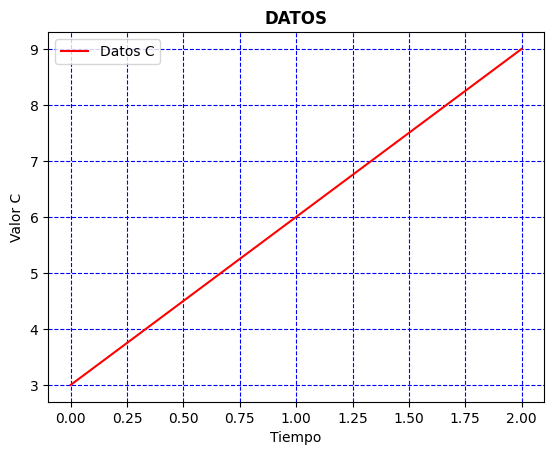

In [30]:
graficaDatos(df2)

In [23]:
def graficaValores(datos):

    plt.figure()
    plt.plot(datos["B"].sort_values(), datos["C"], label="Datos C", color='orange')
    plt.grid(color='b',linestyle='dashed')
    plt.title('DATOS', fontweight='bold')
    plt.xlabel('Valor B')
    plt.ylabel('Valor C')
    plt.legend(loc='upper right')
    plt.show()

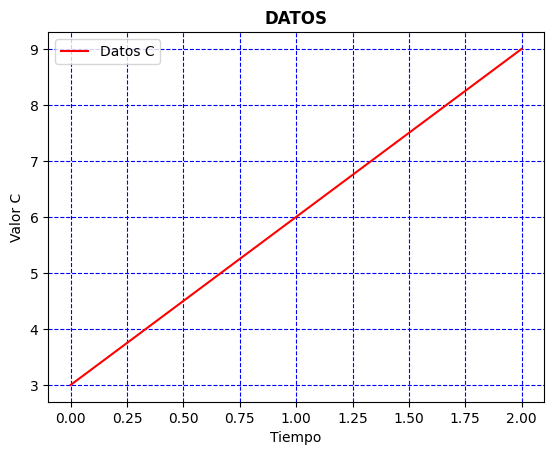

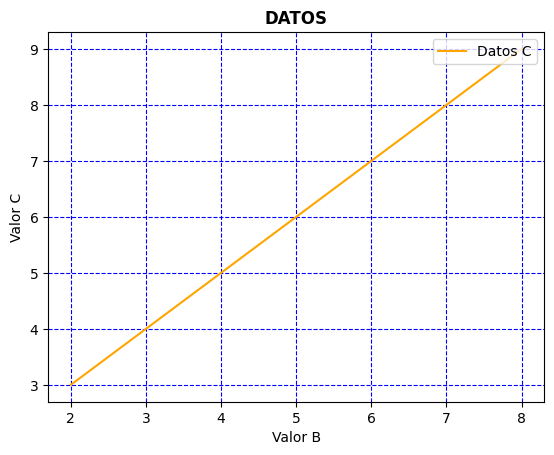

In [29]:
graficaDatos(df2)
graficaValores(df2)

In [21]:
df3 = generaDatos()
print(df3)

     A   B   C   D
0   43  39  17  75
1   82  20  59  93
2   19  12  51  62
3   30  38  43  77
4   22  12  33  50
..  ..  ..  ..  ..
95  12  37   7  60
96  18  84  46   9
97   8  40  37  56
98  83  46  64   0
99  99  67  21  89

[100 rows x 4 columns]


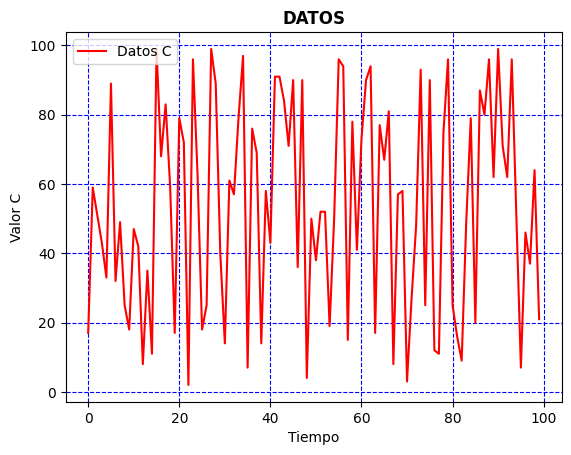

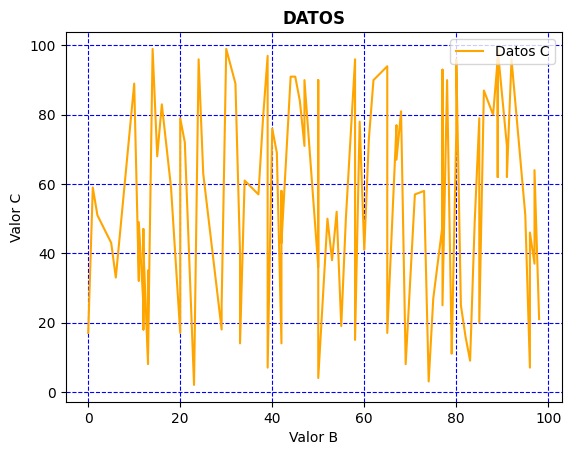

In [28]:
graficaDatos(df3)
graficaValores(df3)